In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
lc_train = pd.read_table("/home/francisco/Escritorio/code/vsbms/data/BIASEDFATS/Test_rrlyr-1.csv", sep= ',')
lc_test = pd.read_table("/home/francisco/Escritorio/code/vsbms/data/BIASEDFATS/Train_rrlyr-1.csv", sep= ',')

In [5]:
data = pd.read_table("/home/francisco/Escritorio/code/Marginal_likelihood/data/FATS/OGLE_FATS_12022019.csv", sep= ',')

In [6]:
new_train = lc_train['ID'].str.split("-", n = 3, expand = True) 
new_test = lc_test['ID'].str.split("-", n = 3, expand = True) 
new_data = data['ID'].str.split("-", n = 3, expand = True) 

In [7]:
# making separate first name column from new data frame 
lc_train["Field"]= new_train[1] 
lc_train['Class']= new_train[2]  
# making separate last name column from new data frame 
lc_test["Field"]= new_test[1] 
lc_test['Class']= new_test[2] 
data["Field"]= new_data[1] 

In [8]:
lc_train['Class'].head(5)

0      ECL
1    RRLYR
2      CEP
3      ECL
4      ECL
Name: Class, dtype: object

In [9]:
lc_test["Field"].head()

0    BLG
1    BLG
2    BLG
3    LMC
4    SMC
Name: Field, dtype: object

In [37]:
fields = np.unique(lc_test["Field"])
fields

array(['BLG', 'GD', 'LMC', 'SMC'], dtype=object)

In [11]:
for f in fields:
    lc= data[data['Field']==f]
    print(f)
    print(lc['Class'].value_counts()/lc.shape[0])
    if True == False:
        sns.jointplot(x=lc['Mean'], y=lc["Beyond1Std"], kind='kde')

BLG
lpv      0.930035
rrlyr    0.068356
t2cep    0.001458
cep      0.000133
acv      0.000013
yso      0.000004
Name: Class, dtype: float64
GD
ecl      0.982160
dsct     0.006461
rrlyr    0.003472
dn       0.003375
lpv      0.002025
cep      0.001736
t2cep    0.000482
acv      0.000193
wd       0.000096
Name: Class, dtype: float64
LMC
lpv      0.610662
ecl      0.177482
rrlyr    0.167279
cep      0.022741
dsct     0.018814
t2cep    0.001387
dpv      0.000927
acep     0.000556
rcb      0.000151
Name: Class, dtype: float64
SMC
lpv      0.594445
ecl      0.181600
cep      0.144895
rrlyr    0.077702
t2cep    0.001357
Name: Class, dtype: float64


In [77]:
lc_test['Amplitude'].min()

0.015

SMC


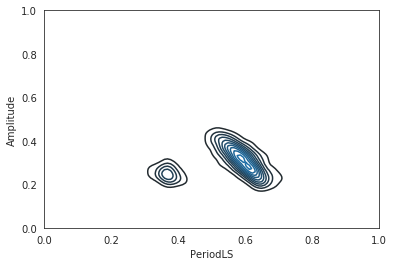

GD


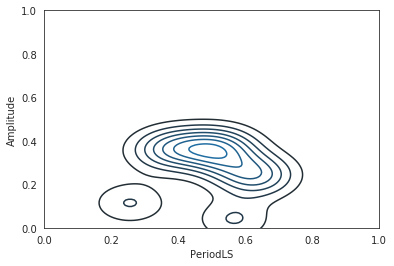

In [67]:
lc_test = lc_test[lc_test['Class']=='RRLYR']
for f in ['SMC', 'GD']:
    lc= lc_test[lc_test['Field']==f]
    print(f)
    sns.kdeplot(lc['PeriodLS'], lc["Amplitude"])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

GD


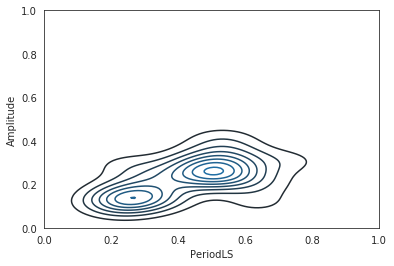

SMC


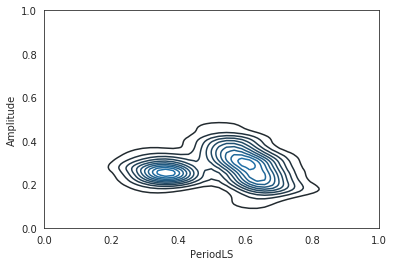

In [68]:
lc_train = lc_train[lc_train['Class']=='RRLYR']
for f in ['GD', 'SMC']:
    lc= lc_train[lc_train['Field']==f]
    print(f)
    sns.set_style("white")
    sns.kdeplot(lc['PeriodLS'], lc["Amplitude"])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

GD
SMC


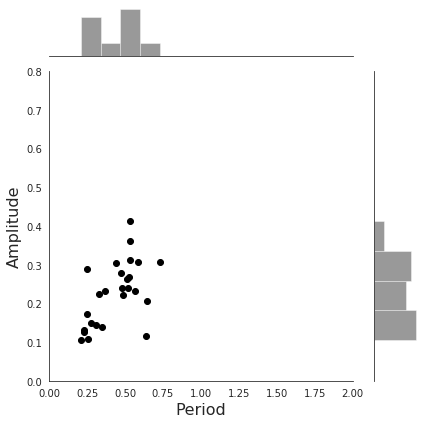

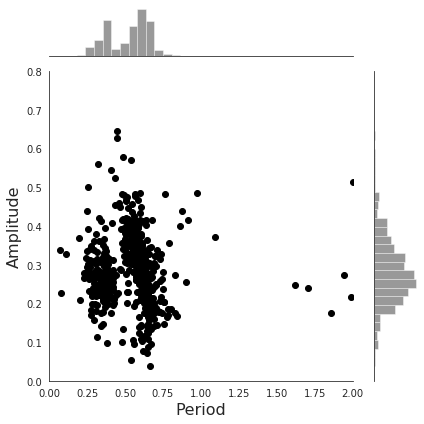

In [52]:
#df = sns.load_dataset('iris')
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(x=lc_train['Amplitude'], y=lc_train["PeriodLS"], kind='scatter')
#sns.jointplot(x=lc_train['Amplitude'], y=lc_train["PeriodLS"], kind='hex')
lc_train = lc_train[lc_train['Class']=='RRLYR']
for f in ['GD', 'SMC']:
    lc= lc_train[lc_train['Field']==f]
    print(f)
    sns.set_style("white")
    h = sns.jointplot(x=lc['PeriodLS'], y=lc["Amplitude"], xlim=(0,2), ylim =(0, 0.8), color='black')
    h.set_axis_labels('x', 'y', fontsize=16)
# or set labels via the axes objects
    h.ax_joint.set_xlabel('Period')
    h.ax_joint.set_ylabel('Amplitude')
    # also possible to manipulate the histogram plots this way, e.g.
    #h.ax_marg_y.grid('on') # with ugly consequences...
    # labels appear outside of plot area, so auto-adjust
    plt.tight_layout()

SMC
BLG


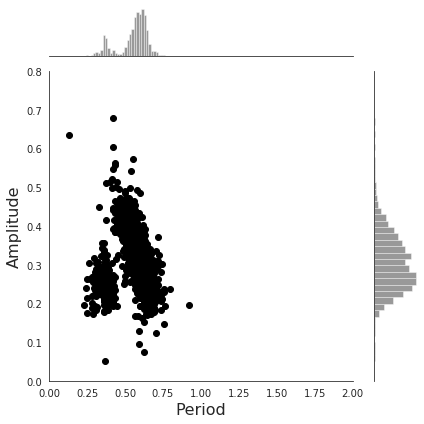

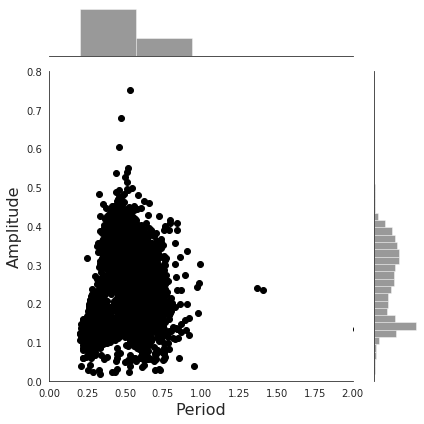

In [53]:
#df = sns.load_dataset('iris')
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(x=lc_train['Amplitude'], y=lc_train["PeriodLS"], kind='scatter')
#sns.jointplot(x=lc_train['Amplitude'], y=lc_train["PeriodLS"], kind='hex')
lc_test = lc_test[lc_test['Class']=='RRLYR']
for f in [ 'SMC', 'BLG']:
    lc= lc_test[lc_test['Field']==f]
    print(f)
    h = sns.jointplot(x=lc['PeriodLS'], y=lc["Amplitude"], kind='scatter', xlim=(0,2), 
                      ylim =(0, 0.8), color='black')
    h.set_axis_labels('x', 'y', fontsize=16)
# or set labels via the axes objects
    h.ax_joint.set_xlabel('Period')
    h.ax_joint.set_ylabel('Amplitude')
    # also possible to manipulate the histogram plots this way, e.g.
    #h.ax_marg_y.grid('on') # with ugly consequences...
    # labels appear outside of plot area, so auto-adjust
    plt.tight_layout()

SMC
GD


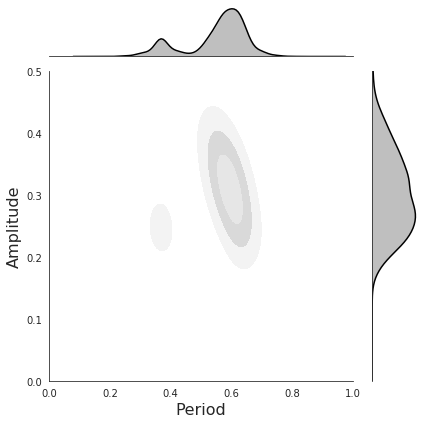

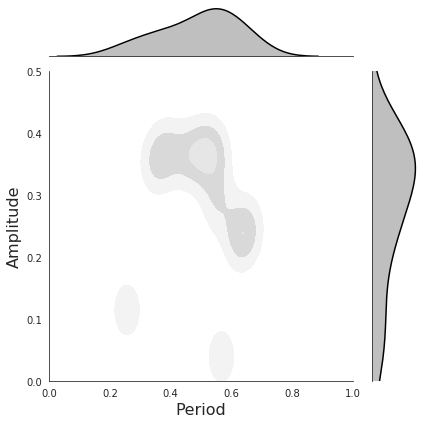

In [152]:
#df = sns.load_dataset('iris')
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(x=lc_train['Amplitude'], y=lc_train["PeriodLS"], kind='scatter')
#sns.jointplot(x=lc_train['Amplitude'], y=lc_train["PeriodLS"], kind='hex')
fifty_shades_of_grey = ["#e6e6e6","#f3f3f3","#d9d9d9"]

lc_test = lc_test[lc_test['Class']=='RRLYR']
for f in [ 'SMC', 'GD']:
    lc= lc_test[lc_test['Field']==f]
    print(f)
    h = sns.jointplot(x=lc['PeriodLS'], y=lc["Amplitude"], kind='kde', xlim=(0,1), 
                      ylim =(0, 0.5), color='black', colors=fifty_shades_of_grey,cmap=None, bw=.04, kernel='triw', 
                      alpha=1, n_levels=3, gridsize=100,
                      shade_lowest=False, shade=True)
    h.set_axis_labels('x', 'y', fontsize=16)
# or set labels via the axes objects
    h.ax_joint.set_xlabel('Period')
    h.ax_joint.set_ylabel('Amplitude')
    # also possible to manipulate the histogram plots this way, e.g.
    #h.ax_marg_y.grid('on') # with ugly consequences...
    # labels appear outside of plot area, so auto-adjust
    plt.tight_layout()

SMC
GD


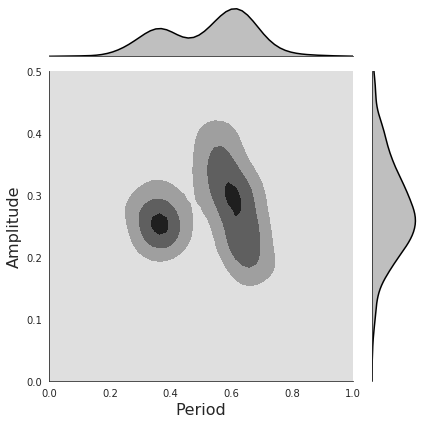

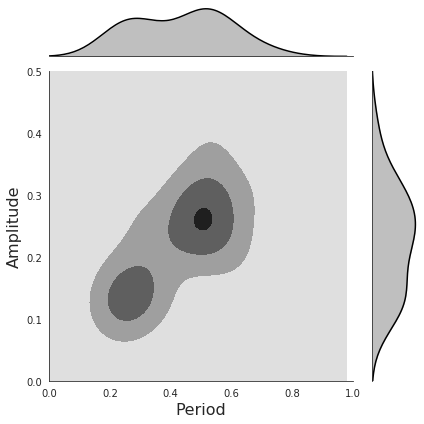

In [151]:
#df = sns.load_dataset('iris')
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(x=lc_train['Amplitude'], y=lc_train["PeriodLS"], kind='scatter')
#sns.jointplot(x=lc_train['Amplitude'], y=lc_train["PeriodLS"], kind='hex')
lc_train = lc_train[lc_train['Class']=='RRLYR']
for f in ['SMC',  'GD']:
    lc= lc_train[lc_train['Field']==f]
    print(f)
    sns.set_style("white")
    h = sns.jointplot(x=lc['PeriodLS'], y=lc["Amplitude"],n_levels=3, xlim=(0,1), ylim =(0, 0.5), kind='kde', color='black')
    h.set_axis_labels('x', 'y', fontsize=16)
# or set labels via the axes objects
    h.ax_joint.set_xlabel('Period')
    h.ax_joint.set_ylabel('Amplitude')
    # also possible to manipulate the histogram plots this way, e.g.
    #h.ax_marg_y.grid('on') # with ugly consequences...
    # labels appear outside of plot area, so auto-adjust
    plt.tight_layout()

BLG


/home/franciscoperez/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


GD
LMC
SMC


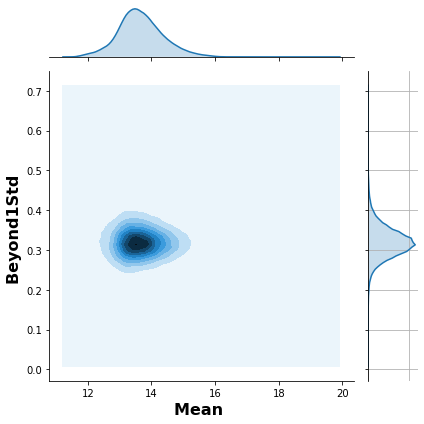

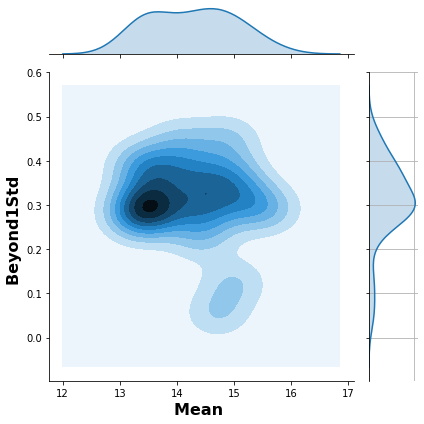

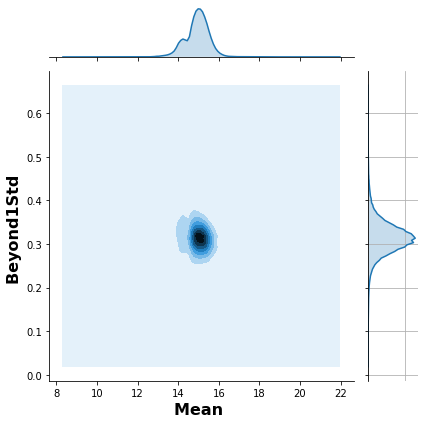

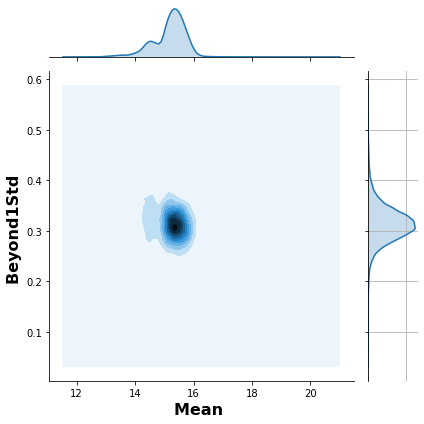

In [12]:
for f in fields:
    lc= lc_train[lc_train['Field']==f]
    print(f)
    h=sns.jointplot(x=lc['Mean'], y=lc["Beyond1Std"], kind='kde')
        
    h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
    h.ax_joint.set_xlabel('Mean ', fontweight='bold')
    h.ax_joint.set_ylabel('Beyond1Std ', fontweight='bold')
    # also possible to manipulate the histogram plots this way, e.g.
    h.ax_marg_y.grid('on') # with ugly consequences...

    # labels appear outside of plot area, so auto-adjust
    plt.tight_layout()
    

GD
SMC


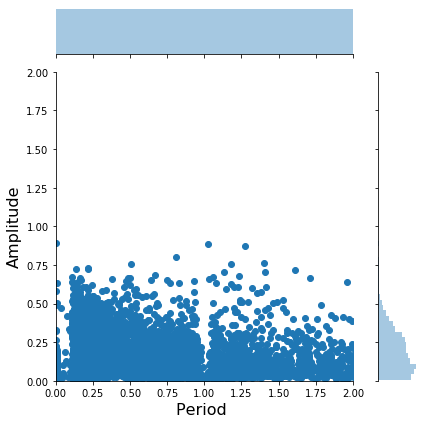

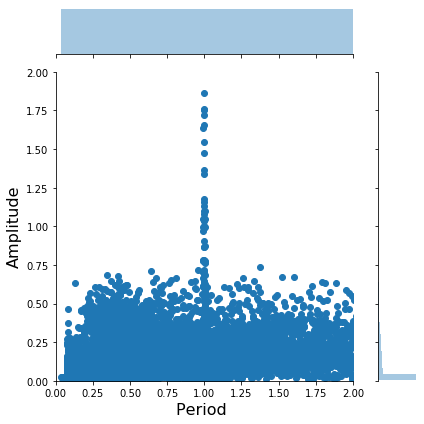

In [35]:
lc_test = lc_test[lc_test['Class']=='rr']

for f in ['GD', 'SMC']:
    lc= lc_test[lc_test['Field']==f]
    print(f)
    h=sns.jointplot(x=lc['PeriodLS'], y=lc["Amplitude"],  xlim=(0,2), ylim=(0,2))
    h.set_axis_labels('x', 'y', fontsize=16)
    h.ax_joint.set_xlabel('Period ')
    h.ax_joint.set_ylabel('Amplitude')
    plt.tight_layout()

In [15]:
sns.jointplot(x=lc_test['Amplitude'], y=lc_test["PeriodLS"], kind='kde')

In [11]:
lc_test.columns

Index(['Unnamed: 0', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0',
       'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2',
       'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0',
       'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2',
       'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2',
       'Freq3_harmonics_amplitude_3', 'Freq